# Machine learning and RNA PolII distribution of foci

## Mariamawit Ashenafi



## Introduction

RNA PolII: Enzyme implicated in gene expression 


# Wetlab methods

- Nuclei isolation and conservation
    - Extract nuclei from Arabidopsis leaves
    - Gel embedding of nuclei on slides
- Immunostaining - antibodies (add links)
    - RNA PolII NP :
    - RNA PolII Ser5P :
    - RNA PolII Ser2P :
    - DNA : stained in DAPI 
- Image acquisition _STED microscopy
    - Objectif: 63 Glycerol
    -  



# Is there a distribution pattern of the foci?

- In regards to DNA amount 
- In regards to chromocenters, nucleolus and nucleus center of mass(approximation to periphery)
- In regards to other RNA PolII foci

## Image processing 

(Plugins are developped in python to collect features from 3D images and export them in .csv files)

1. List plugins and their description  
2. 

### Features
(.csv files are then processed in R to manage the data better)

1. Features : 
2. Label : 

In [1]:
### python packages required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn-white')
from sklearn import metrics
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble, preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
### make plot appear inline
% matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Getting the data

The .csv files resulting from CalculateDistance.R are in 5 different folders.
This was necessary, because in R there is a limited amount of space available for a vector.
So here, try to bind all files in one table

#### Read observed data

In [6]:
FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/1/XTCountSpotPerShell_Result/MLResult.csv"
features = pd.read_csv(FilePath)

In [7]:
features

,SpotId,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,...,Nucleolus,MeanCC,ClosestCC,VolumeCC,IntensityCh0CC,IntensityCh1CC,IntensityCh2CC,IntensityCh3CC,SegmentChannel,Mask
0,1,1,s20_wt_aa_series005.ims,0.179932,0.177205,0.179932,NaN,NaN,NaN,0.134319,...,1.340133,1.427632,0.336761,2.186887,0.645331,0.233948,0.464393,0.470312,1.129943,-1
1,2,1,s20_wt_aa_series005.ims,0.179932,0.177205,0.179932,NaN,NaN,NaN,NaN,...,1.340133,1.427632,0.280193,2.186887,0.645331,0.233948,0.464393,0.470312,0.973274,-1
2,3,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.181028,...,1.340133,1.427632,0.140604,2.186887,0.645331,0.233948,0.464393,0.470312,0.973274,-1
3,4,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.128075,...,1.340133,1.427632,-0.558046,2.186887,0.645331,0.233948,0.464393,0.470312,1.129943,-1
4,5,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.340133,1.427632,-0.929652,2.186887,0.645331,0.233948,0.464393,0.470312,1.129943,-1
5,6,1,s20_wt_aa_series005.ims,0.181239,0.177205,0.189542,NaN,NaN,NaN,0.173802,...,1.340133,1.427632,-1.276170,2.186887,0.645331,0.233948,0.464393,0.470312,0.973274,-1
6,7,1,s20_wt_aa_series005.ims,0.141405,0.141405,0.141405,0.107745,0.107745,0.107745,0.181268,...,1.340133,1.427632,-1.714843,2.186887,0.645331,0.233948,0.464393,0.470312,1.129943,-1
7,8,1,s20_wt_aa_series005.ims,0.152193,0.152193,0.152193,NaN,NaN,NaN,0.181268,...,1.340133,1.427632,0.774851,2.186887,0.645331,0.233948,0.464393,0.470312,1.129943,-1
8,9,1,s20_wt_aa_series005.ims,0.152193,0.152193,0.152193,NaN,NaN,NaN,0.158424,...,1.340133,1.427632,0.826033,2.186887,0.645331,0.233948,0.464393,0.470312,1.129943,-1
9,10,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.012142,...,1.340133,1.427632,1.513154,2.186887,0.645331,0.233948,0.464393,0.470312,1.129943,-1


In [10]:
#del features
Result=pd.DataFrame()
for p in range(1,5):
    FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/"+str(p)+"/XTCountSpotPerShell_Result/MLResult.csv"
    #FilePath = "Z:/Result0309/s20_Wt/"+str(p)+"/XTCountSpotPerShell_Result/MLResult.csv" for windows
    features = pd.read_csv(FilePath)
    Result=Result.append(features)
del features

In [9]:
#Result.to_csv("/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/MLResultObs.csv")
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/MLResultObs.csv" # for linux
#FilePath = "Z:/Result0309/s20_Wt/MLResultObs.csv" # for windows
print(Result.shape)
print (Result.columns)

(2485727, 39)
Index([u'SpotId', u'FociType', u'File', u'Sp1MeanDist', u'Sp1MinDist',
       u'Sp1MaxDist', u'Sp2MeanDist', u'Sp2MinDist', u'Sp2MaxDist',
       u'Sp3MeanDist', u'Sp3MinDist', u'Sp3MaxDist', u'N1Volume',
       u'N1IntensityCh0', u'N1IntensityCh1', u'N1IntensityCh2',
       u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0', u'N2IntensityCh1',
       u'N2IntensityCh2', u'N2IntensityCh3', u'IntensityCh0', u'IntensityCh1',
       u'IntensityCh2', u'IntensityCh3', u'Sp1NumbSpot', u'Sp2NumbSpot',
       u'Sp3NumbSpot', u'Nucleus', u'Nucleolus', u'MeanCC', u'ClosestCC',
       u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC', u'IntensityCh2CC',
       u'IntensityCh3CC', u'SegmentChannel'],
      dtype='object')


In [3]:
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/MLResultObs.csv"
FilePath = "Z:/Result0309/s20_Wt/MLResultObs.csv"
Result = pd.read_csv(FilePath)
print(Result.shape)
Result = Result.drop(['Mask', "Unnamed: 0"], 1) #I don't need Mask column Mask, there is only one mask in the simualte data: the one that excludes CCs and nucleolus
print(Result.shape)

(2485727, 41)
(2485727, 40)


#### Read simulated data

In [2]:
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/2/XTSimulateRandomSpots_Result/MLResultSim.csv"
FilePath = "Z:/Result0309/s20_Wt/2/XTSimulateRandomSpots_Result/MLResultSim.csv" # for windows
features = pd.read_csv(FilePath)
print(features.columns)

Index([u'SpotId', u'FociType', u'File', u'Sp1MeanDist', u'Sp1MinDist',
       u'Sp1MaxDist', u'Sp2MeanDist', u'Sp2MinDist', u'Sp2MaxDist',
       u'Sp3MeanDist', u'Sp3MinDist', u'Sp3MaxDist', u'N1Volume',
       u'N1IntensityCh0', u'N1IntensityCh1', u'N1IntensityCh2',
       u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0', u'N2IntensityCh1',
       u'N2IntensityCh2', u'N2IntensityCh3', u'IntensityCh0', u'IntensityCh1',
       u'IntensityCh2', u'IntensityCh3', u'Sp1NumbSpot', u'Sp2NumbSpot',
       u'Sp3NumbSpot', u'Nucleus', u'Nucleolus', u'MeanCC', u'ClosestCC',
       u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC', u'IntensityCh2CC',
       u'IntensityCh3CC', u'SegmentChannel'],
      dtype='object')


In [50]:
#del features
ResultSim=pd.DataFrame()
for p in range(1,5):
    #FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/"+str(p)+"/XTSimulateRandomSpots_Result/MLResultSim.csv"
    FilePath = "Z:/Result0309/s20_Wt/"+str(p)+"/XTSimulateRandomSpots_Result/MLResultSim.csv"# for windows
    features = pd.read_csv(FilePath)
    ResultSim=ResultSim.append(features)
del features

In [55]:
b=ResultSim.loc[ResultSim["FociType"].isnull(), ]
b.columns

Index([u'SpotId', u'FociType', u'File', u'Sp1MeanDist', u'Sp1MinDist',
       u'Sp1MaxDist', u'Sp2MeanDist', u'Sp2MinDist', u'Sp2MaxDist',
       u'Sp3MeanDist', u'Sp3MinDist', u'Sp3MaxDist', u'N1Volume',
       u'N1IntensityCh0', u'N1IntensityCh1', u'N1IntensityCh2',
       u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0', u'N2IntensityCh1',
       u'N2IntensityCh2', u'N2IntensityCh3', u'IntensityCh0', u'IntensityCh1',
       u'IntensityCh2', u'IntensityCh3', u'Sp1NumbSpot', u'Sp2NumbSpot',
       u'Sp3NumbSpot', u'Nucleus', u'Nucleolus', u'MeanCC', u'ClosestCC',
       u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC', u'IntensityCh2CC',
       u'IntensityCh3CC', u'SegmentChannel'],
      dtype='object')

In [59]:
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/MLResultSim.csv" #for linux
FilePath = "Z:Result0309/s20_Wt/MLResultSim.csv" #for windows
ResultSim.to_csv(FilePath)
print(ResultSim.shape)
print (ResultSim.columns)

(960000, 39)
Index([u'SpotId', u'FociType', u'File', u'Sp1MeanDist', u'Sp1MinDist',
       u'Sp1MaxDist', u'Sp2MeanDist', u'Sp2MinDist', u'Sp2MaxDist',
       u'Sp3MeanDist', u'Sp3MinDist', u'Sp3MaxDist', u'N1Volume',
       u'N1IntensityCh0', u'N1IntensityCh1', u'N1IntensityCh2',
       u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0', u'N2IntensityCh1',
       u'N2IntensityCh2', u'N2IntensityCh3', u'IntensityCh0', u'IntensityCh1',
       u'IntensityCh2', u'IntensityCh3', u'Sp1NumbSpot', u'Sp2NumbSpot',
       u'Sp3NumbSpot', u'Nucleus', u'Nucleolus', u'MeanCC', u'ClosestCC',
       u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC', u'IntensityCh2CC',
       u'IntensityCh3CC', u'SegmentChannel'],
      dtype='object')


### Merge observed and simulated data

In [48]:
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/MLResultSim.csv"
FilePath = "Z:/Result0309/s20_Wt/MLResultSim.csv"
ResultSim = pd.read_csv(FilePath)
ResultSim = ResultSim.drop("Unnamed: 0", 1) #I don't need Mask column Mask, there is only one mask in the simualte data: the one that excludes CCs and nucleolus
print(ResultSim.shape)
ResultSim.loc[ResultSim["FociType"].isnull(),]

(1330000, 39)


,ClosestCC,File,FociType,IntensityCh0,IntensityCh0CC,IntensityCh1,IntensityCh1CC,IntensityCh2,IntensityCh2CC,IntensityCh3,...,Sp2MaxDist,Sp2MeanDist,Sp2MinDist,Sp2NumbSpot,Sp3MaxDist,Sp3MeanDist,Sp3MinDist,Sp3NumbSpot,SpotId,VolumeCC
450000,-0.547179,s20_wt_ay_series029.ims,NaN,-0.884593,5.530430,-0.208139,-0.561210,-0.344045,-0.641308,2.498945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.416382
450001,-0.023554,s20_wt_ay_series029.ims,NaN,0.054183,-0.478087,-0.208139,-0.561210,2.460660,-0.641308,2.498945,...,0.857518,1.104079,1.164046,1.0,NaN,NaN,NaN,NaN,2,-0.416382
450002,-0.420890,s20_wt_ay_series029.ims,NaN,-0.321327,-0.077742,-0.208139,0.043976,-0.344045,0.014569,-0.351826,...,0.679002,0.809123,0.809810,2.0,NaN,NaN,NaN,NaN,3,-0.264860
450003,-0.881366,s20_wt_ay_series029.ims,NaN,-0.665545,-0.027296,-0.208139,0.006359,-0.344045,-0.114841,-0.351826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2.938484
450004,1.119664,s20_wt_ay_series029.ims,NaN,-0.915885,-0.027296,-0.208139,0.006359,-0.344045,-0.114841,-0.351826,...,0.101240,0.326245,0.485900,1.0,NaN,NaN,NaN,NaN,5,2.938484
450005,0.560750,s20_wt_ay_series029.ims,NaN,-0.227450,-0.478087,-0.208139,-0.561210,-0.344045,-0.641308,-0.351826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,-0.416382
450006,1.549081,s20_wt_ay_series029.ims,NaN,-0.884593,-0.027296,-0.208139,0.006359,-0.344045,-0.114841,-0.351826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2.938484
450007,-0.969961,s20_wt_ay_series029.ims,NaN,-0.884593,5.530430,-0.208139,-0.561210,-0.344045,-0.641308,-0.351826,...,-1.031560,-0.960388,-0.741807,2.0,NaN,NaN,NaN,NaN,8,-0.416382
450008,0.851570,s20_wt_ay_series029.ims,NaN,-0.884593,-0.077742,-0.208139,0.043976,-0.344045,0.014569,-0.351826,...,-0.897378,-0.700835,-0.409549,1.0,NaN,NaN,NaN,NaN,9,-0.264860
450009,0.045144,s20_wt_ay_series029.ims,NaN,0.367108,0.360692,-0.208139,-0.027564,-0.344045,-0.015071,2.498945,...,0.679002,-0.031046,-0.655174,2.0,NaN,NaN,NaN,NaN,10,-0.242278


In [47]:
#del ResultSim 
FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/MLResultObs.csv"
FilePath = "Z:/Result0309/s20_Wt/MLResultObs.csv"
ResultObs = pd.read_csv(FilePath)
ResultObs = ResultObs.drop(["Mask", "Unnamed: 0"], 1) #I don't need Mask column Mask, there is only one mask in the simualte data: the one that excludes CCs and nucleolus
print(ResultObs.shape)
ResultObs.loc[ResultObs["FociType"].isnull(),]

(2485727, 39)


,SpotId,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,...,Nucleus,Nucleolus,MeanCC,ClosestCC,VolumeCC,IntensityCh0CC,IntensityCh1CC,IntensityCh2CC,IntensityCh3CC,SegmentChannel


In [61]:
Result=ResultObs.append(ResultSim)

In [62]:
print(Result.shape)
Result.loc[Result["FociType"].isnull(),]

(3445727, 39)


,SpotId,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,...,Nucleus,Nucleolus,MeanCC,ClosestCC,VolumeCC,IntensityCh0CC,IntensityCh1CC,IntensityCh2CC,IntensityCh3CC,SegmentChannel


In [65]:
del ResultSim,ResultObs 

In [66]:
print(Result.shape)
Result.to_csv("Z:/Result0309/s20_Wt/MLResultR.csv")


(3445727, 39)


In [2]:
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/MLResultR.csv"# for linux
FilePath = "Z:/Result0309/s20_Wt/MLResultR.csv"# for windows
Result = pd.read_csv(FilePath)

In [4]:
Result = Result.drop("Unnamed: 0", 1)
Result.iloc[0,]

SpotId                                  1
FociType                                1
File              s20_wt_aa_series005.ims
Sp1MeanDist                      0.179932
Sp1MinDist                       0.177205
Sp1MaxDist                       0.179932
Sp2MeanDist                           NaN
Sp2MinDist                            NaN
Sp2MaxDist                            NaN
Sp3MeanDist                      0.134319
Sp3MinDist                       0.134319
Sp3MaxDist                       0.134319
N1Volume                          287.305
N1IntensityCh0                    2.07916
N1IntensityCh1                    3.74131
N1IntensityCh2                    10.9559
N1IntensityCh3                    28.1389
N2Volume                          4.70839
N2IntensityCh0                    2.03985
N2IntensityCh1                     4.4995
N2IntensityCh2                    13.7396
N2IntensityCh3                     25.119
IntensityCh0                    -0.261509
IntensityCh1                      

# Feature normalization

1. Distances, intensities and CC volumes have already been scaled per image
2. Nucleus and and nucleolus features though have not been scaled yet 
3. Plot data and see if Log transforming the features is necessary

In [5]:
#del features
Result.columns

Index([u'SpotId', u'FociType', u'File', u'Sp1MeanDist', u'Sp1MinDist',
       u'Sp1MaxDist', u'Sp2MeanDist', u'Sp2MinDist', u'Sp2MaxDist',
       u'Sp3MeanDist', u'Sp3MinDist', u'Sp3MaxDist', u'N1Volume',
       u'N1IntensityCh0', u'N1IntensityCh1', u'N1IntensityCh2',
       u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0', u'N2IntensityCh1',
       u'N2IntensityCh2', u'N2IntensityCh3', u'IntensityCh0', u'IntensityCh1',
       u'IntensityCh2', u'IntensityCh3', u'Sp1NumbSpot', u'Sp2NumbSpot',
       u'Sp3NumbSpot', u'Nucleus', u'Nucleolus', u'MeanCC', u'ClosestCC',
       u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC', u'IntensityCh2CC',
       u'IntensityCh3CC', u'SegmentChannel'],
      dtype='object')

##### Scale nucleus and nuclei features 
(Other columns have already been scaled by image))

In [6]:
ColumnsToScale = [u'N1IntensityCh0',
       u'N1IntensityCh1', u'N1IntensityCh2', u'N1IntensityCh3', u'N1Volume',
       u'N2IntensityCh0', u'N2IntensityCh1', u'N2IntensityCh2',
       u'N2IntensityCh3', u'N2Volume']
newdf = pd.DataFrame(preprocessing.scale(Result[ColumnsToScale]), index=Result.index, columns=ColumnsToScale)
newdf1 = Result.drop(ColumnsToScale, 1)
newdf = pd.concat([newdf1, newdf], axis=1)
del newdf1
newdf.head()

,SpotId,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,...,N1IntensityCh0,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume
0,1,1,s20_wt_aa_series005.ims,0.179932,0.177205,0.179932,NaN,NaN,NaN,0.134319,...,0.603717,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472
1,2,1,s20_wt_aa_series005.ims,0.179932,0.177205,0.179932,NaN,NaN,NaN,NaN,...,0.603717,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472
2,3,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.181028,...,0.603717,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472
3,4,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.128075,...,0.603717,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472
4,5,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.603717,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472


## Visualise features
0. Drop SpotId = don't need that column
1. Drop Categorical columns : FociType, File = Data1

In [7]:
#remove SpotId column
newdf=newdf.drop("SpotId", axis=1)

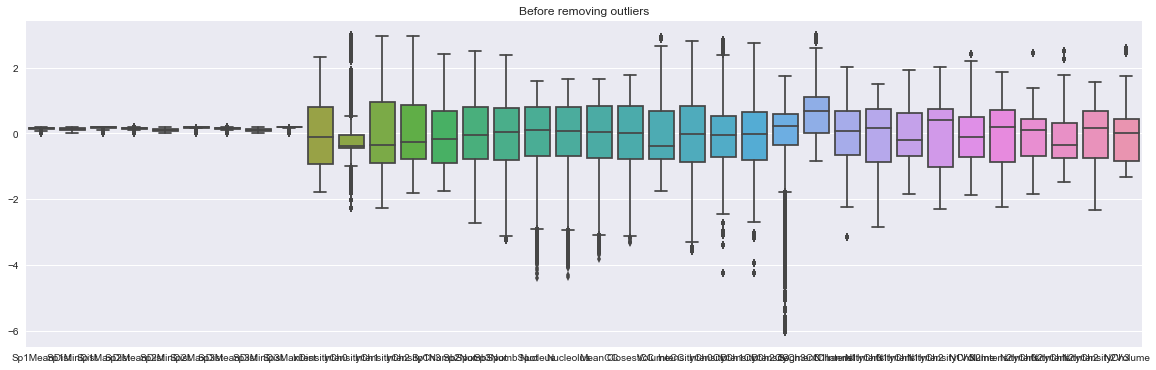

In [70]:
#Boxplot feature before removing outliers
test=newdf.drop(["FociType", "File"], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=test)
plt.title("Before removing outliers")

## Add ploidy index

In [8]:
FilePath = "Z:/Result0309/s20_Wt/XTNucleiPloidy_Result/XTNucleiPloidy_Result.csv"# for windows
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/XTNucleiPloidy_Result/XTNucleiPloidy_Result.csv"# for linux
Ploidy = pd.read_csv(FilePath)
Ploidy.head()

,ClusterId,FileName,MeanIntensity,SumIntensity,Volume
0,P0,s20_wt_aa_series005.ims,27.313093,262055504.0,306.573273
1,P0,s20_wt_ab_series006.ims,23.910700,164479776.0,219.863632
2,P0,s20_wt_ac_series007.ims,31.358595,91467160.0,93.077141
3,P0,s20_wt_ad_series008.ims,42.793816,230455280.0,172.106857
4,P0,s20_wt_ae_series009.ims,40.791016,316271360.0,247.735687


In [9]:
Ploidy=Ploidy[["ClusterId", "FileName"]]
newdf = newdf.join(Ploidy.set_index('FileName'), on='File')
newdf.head()

,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,...,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId
0,1,s20_wt_aa_series005.ims,0.179932,0.177205,0.179932,NaN,NaN,NaN,0.134319,0.134319,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,P0
1,1,s20_wt_aa_series005.ims,0.179932,0.177205,0.179932,NaN,NaN,NaN,NaN,NaN,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,P0
2,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.181028,0.175437,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,P0
3,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.128075,0.128075,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,P0
4,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,P0


## Manage missing data

1. Factorise categorical columns
2. In NumbSpot column NaN means there wasn't a neigbouring point inside 0.2 radius = replace NaN with 0
3. MeanDist, MinDist, MaxDist : NaN in these columns if there is no neibouring point = replace values with 10 (scaled values only go up to 3)

In [8]:
lab=newdf["FociType"].values
pd.factorize(lab)[0]

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [10]:
FactorColumns=["FociType", "File", "ClusterId"]
for c in FactorColumns:
    newdf[c] = pd.factorize(newdf[c])[0]
for c in ["Sp1NumbSpot", "Sp2NumbSpot", "Sp3NumbSpot"]:
    newdf[c] = newdf[c].fillna(0)
for c in ["Sp1MeanDist", "Sp1MinDist", "Sp1MaxDist", "Sp2MeanDist", "Sp2MinDist", "Sp2MaxDist", "Sp3MeanDist", "Sp3MinDist", "Sp3MaxDist"]:
    newdf[c] = newdf[c].fillna(10) 
#Replace other NaN by 0
newdf=newdf.fillna(0)    
newdf.head()

,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,...,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId
0,0,0,0.179932,0.177205,0.179932,10.0,10.0,10.0,0.134319,0.134319,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,0
1,0,0,0.179932,0.177205,0.179932,10.0,10.0,10.0,10.000000,10.000000,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,0
2,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.181028,0.175437,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,0
3,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.128075,0.128075,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,0
4,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.000000,10.000000,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,0


## Visualise data
(see average and standart deviation of columns)

KeyboardInterrupt: 

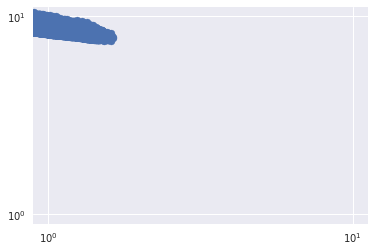

In [97]:
df1 = newdf.drop(['Sp1NumbSpot', 'Sp2NumbSpot', "Sp3NumbSpot", "FociType", "File"], axis=1)
fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(df1.mean(1),df1.var(1))

In [ ]:
fig,ax = plt.subplots()
ax.scatter(newdf.mean(1), newdf.std(1))

## Visualise data with PCA

In [98]:
#perform PCA transformation
features = newdf.drop(['FociType', 'File','ClusterId'], axis=1)
labels = newdf["FociType"]
pca = PCA(n_components=4)
Y = pca.fit_transform(features)


In [10]:
COLORS = np.array([
    '#7fc97f',
    '#beaed4',
    '#fdc086',
    '#ffff99',
    '#386cb0',
    '#f0027f',
    '#bf5b17',
    '#666666',    
])


In [28]:
#a=np.random(labels, 20)
labels=pd.Categorical(labels).codes

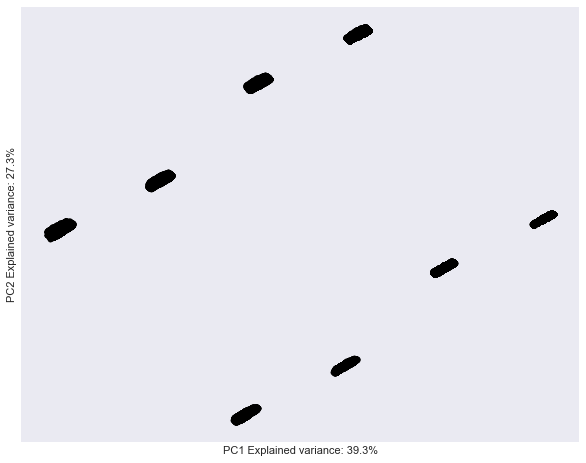

In [100]:
#plot results
fig = plt.figure(figsize=(10, 8))
ax = plt.scatter(Y[:, 0], Y[:, 1], s=30, c=COLORS[labels])
#cbar = plt.colorbar(ax, ticks=range(6))
#cbar.ax.set_yticklabels(range(6))
ax.set_facecolor('black')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[1]))
plt.show()

In [ ]:
#plot results
fig = plt.figure(figsize=(10, 8))
ax = plt.scatter(Y[:, 2], Y[:, 3], s=30, c=COLORS[labels])
#cbar = plt.colorbar(ax, ticks=range(6))
#cbar.ax.set_yticklabels(range(6))
ax.set_facecolor('black')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC3 Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[2]))
plt.ylabel('PC4 Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[3]))
plt.show()

(PCA: There is a higher cluster and there is a lower clustering between foci isoforms)
##Teach the machine to classify different PolII isoforms 

In [31]:
rho, pval=stats.spearmanr(newdf, Y.T[0])
rho=pd.DataFrame(rho)

In [32]:
rho

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.000000,-0.008374,0.013625,-0.044856,0.041672,-0.013316,0.028440,-0.001518,0.000644,0.002179,...,0.007386,0.006773,-0.006228,0.003632,0.004118,0.005800,0.005754,-0.004019,-0.000283,-0.005839
1,-0.008374,1.000000,-0.604357,-0.000661,-0.017762,0.098285,-0.002773,0.052616,-0.037545,0.010299,...,-0.668423,-0.432630,0.315014,-0.216895,-0.286080,-0.499498,-0.371324,0.052439,-0.194432,0.486653
2,0.013625,-0.604357,1.000000,0.121083,0.016298,-0.261994,0.003196,-0.378982,0.037085,0.298923,...,0.470441,0.405874,-0.232505,0.328439,0.344437,0.418947,0.407624,-0.106744,0.174961,-0.447349
3,-0.044856,-0.000661,0.121083,1.000000,-0.011366,-0.233697,0.002636,-0.174822,-0.001804,0.098610,...,-0.001830,-0.002289,-0.000061,-0.002000,-0.001857,-0.001625,-0.001538,-0.001649,-0.002397,-0.007078
4,0.041672,-0.017762,0.016298,-0.011366,1.000000,0.011945,0.411288,0.002178,0.511123,0.000846,...,0.023901,0.012565,-0.007168,0.001727,0.016518,0.030458,0.016849,-0.017648,-0.000222,-0.031262
5,-0.013316,0.098285,-0.261994,-0.233697,0.011945,1.000000,-0.000931,0.249897,0.013712,-0.254966,...,-0.115941,-0.199821,-0.026442,-0.196475,-0.198852,-0.134929,-0.211005,0.022207,-0.205153,0.240402
6,0.028440,-0.002773,0.003196,0.002636,0.411288,-0.000931,1.000000,0.010366,0.448887,-0.001231,...,0.006886,0.002693,-0.002017,-0.030824,-0.005251,0.011851,-0.004595,-0.025304,-0.018197,-0.000383
7,-0.001518,0.052616,-0.378982,-0.174822,0.002178,0.249897,0.010366,1.000000,-0.002055,-0.505540,...,-0.072541,-0.066380,0.009777,-0.058506,-0.066414,-0.064471,-0.062546,-0.002315,-0.047784,0.051257
8,0.000644,-0.037545,0.037085,-0.001804,0.511123,0.013712,0.448887,-0.002055,1.000000,0.005560,...,0.026315,0.005600,-0.014037,-0.012683,-0.005865,0.017473,0.005177,-0.010353,-0.016070,-0.028696
9,0.002179,0.010299,0.298923,0.098610,0.000846,-0.254966,-0.001231,-0.505540,0.005560,1.000000,...,-0.018851,-0.003405,0.007948,0.002055,-0.001660,-0.016491,0.000628,-0.003826,0.001109,-0.011138


## Predict FociType column
*** Simualted vs observed ***

In [106]:
#FociType label for simulated data
a=newdf.loc[newdf['SegmentChannel']==0, "FociType"]
pd.Categorical(a)

[3, 3, 3, 3, 3, ..., 5, 5, 5, 5, 5]
Length: 960000
Categories (3, int64): [3, 4, 5]

In [101]:
#Seperate features and labels and put them in arrays
#features = newdf.drop(['FociType'], axis=1) #with all the features
features = newdf.drop(['FociType','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab = features.columns
features = features.values
labels = newdf["FociType"].values

In [102]:
##Random Forest classifer
rf = ensemble.RandomForestClassifier(n_estimators=101)
prediction = cross_validation.cross_val_predict(rf, features, labels)

### Check classifier result

Accuracy for all:
0.411563075078
Accuracy for observed data:
0.494674998501
Accuracy for simulated data:
0.196361458333


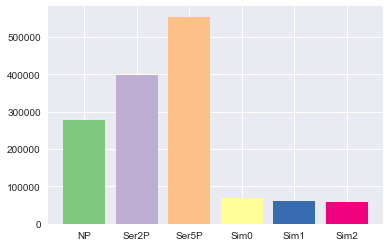

In [134]:
Pred=newdf
Pred["RdForestT"]=prediction == labels
print("Accuracy for all:")
print(metrics.accuracy_score(labels, prediction))
print("Accuracy for observed data:")
Obs=Pred.loc[Pred["SegmentChannel"]!=0, "RdForestT"]
print(Obs.values.mean())
print("Accuracy for simulated data:")
Obs=Pred.loc[Pred["SegmentChannel"]==0, "RdForestT"]
print(Obs.values.mean())
res = prediction == labels
Sp1=res[labels == 0].sum()
Sp2=res[labels == 1].sum()
Sp3=res[labels == 2].sum()
Sp4=res[labels == 3].sum()
Sp5=res[labels == 4].sum()
Sp6=res[labels == 5].sum()
DiffList=[Sp1, Sp2, Sp3, Sp4, Sp5, Sp6]
xLab=["0","NP", "Ser2P", "Ser5P"]+ ["Sim"+str(i) for i in range(3)]
fig,ax = plt.subplots()
plt.bar(range(6), DiffList, align="center", color= COLORS)
#ax.set_xticks(range(6))
ax.set_xticklabels(xLab)
plt.show()

## Fine tune parameters
### Split data

In [10]:
TrainSet,TestSet = train_test_split(newdf, test_size=0.3, random_state=18012017)
features= TrainSet.drop(['FociType','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values
labels  = TrainSet["FociType"].values

1. Fine tune number of trees in terms of accuracy 
2. Set scoring ="f1_weighted", because I have different number of foci for each foci type, this can explain why I get higher accuracy for Ser5P compared to the others  = I need to compensate for unbalanced data. I want to see which number to tree does that best.

Weighted: Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). 

In [29]:
range(10,70,10)

[10, 20, 30, 40, 50, 60]

In [36]:
F1Score=[]
Accuracy=[]
for nbreTree in range(10,140,10):
    rf = ensemble.RandomForestClassifier(n_estimators=nbreTree)
    GetF1 = cross_validation.cross_val_score(rf, features, labels, cv=10, scoring="f1_weighted")
    F1Score.append(GetF1)
    print(nbreTree)

70
80
90
100
110
120
130


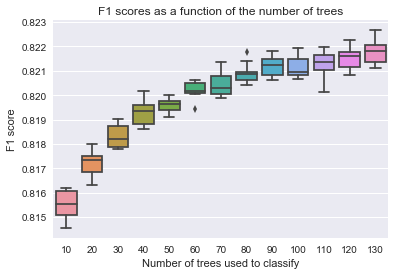

In [37]:
sns.boxplot(range(10,140,10), F1Score)
plt.xlabel("Number of trees used to classify")
plt.ylabel("F1 score")
plt.title("F1 scores as a function of the number of trees")
plt.show()

In [38]:
Accuracy=[]
for nbreTree in range(10,100,10):
    rf = ensemble.RandomForestClassifier(n_estimators=nbreTree)
    GetScore = cross_validation.cross_val_score(rf, features, labels, cv=10)
    Accuracy.append(GetScore)
    print(nbreTree)

KeyboardInterrupt: 

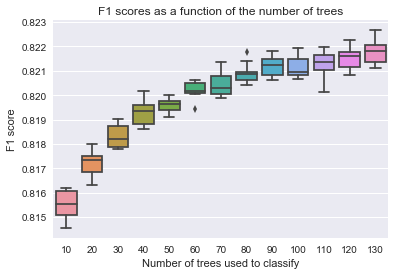

In [37]:
sns.boxplot(range(10,140,10), F1Score)
plt.xlabel("Number of trees used to classify")
plt.ylabel("Accuracy score")
plt.title("Accuracy scores as a function of the number of trees")
plt.show()

In [ ]:
rf= ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(features,labels)
impFeatures=rf.feature_importances_

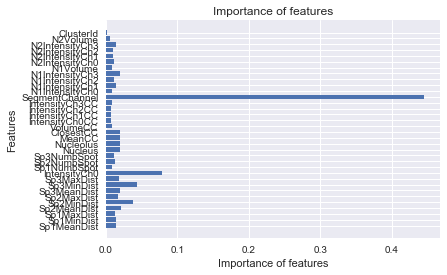

In [40]:
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features")
plt.show()

### Simulated vs Observed
1. Simulated spots have null value in SegmentChannel column. it is a very clean seperation there. So this is why that feature is most important. This result is an artifact. I want to do the same analysis just for observed spots to see which features are important
2. I want to split the data while preserving the ratio of each foci type


In [17]:
labels  = newdf["FociType"].values
TrainSet,TestSet = train_test_split(newdf,stratify=labels, test_size=0.3, random_state=20012017)

In [50]:
features=TrainSet[TrainSet["FociType"]<3]
labels  = features["FociType"].values
features= features.drop(['FociType','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values

In [53]:
pd.Categorical(labels)

[1, 1, 2, 2, 2, ..., 2, 1, 0, 2, 2]
Length: 1740008
Categories (3, int64): [0, 1, 2]

In [51]:
rf= ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(features,labels)
impFeatures=rf.feature_importances_

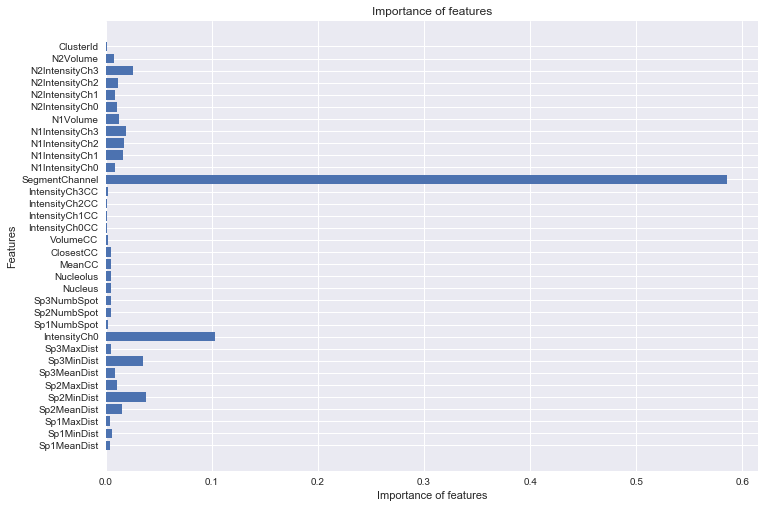

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features")
plt.show()

#### Selected features

In [65]:
SelFeat = ["SegmentChannel", "IntensityCh0", "Sp3MinDist", "Sp2MinDist"]
Ylab = ["Immunostaining signal intensity", "DAPI intensity", "Distance to closest Ser5P foci", "Distance to closest Ser2P foci"]

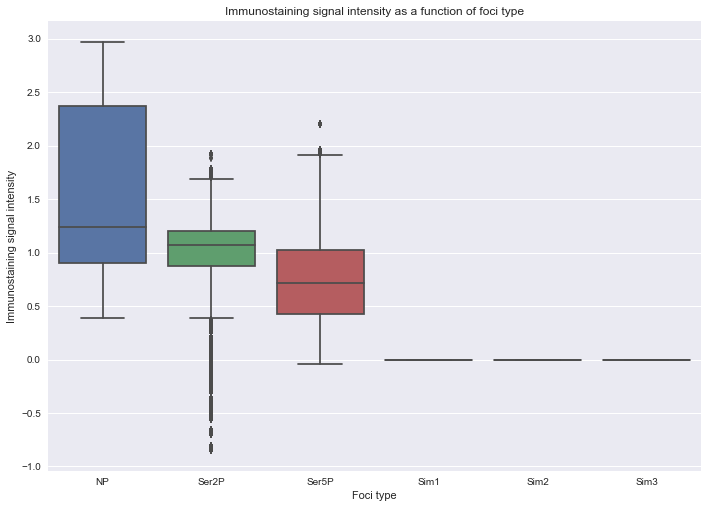

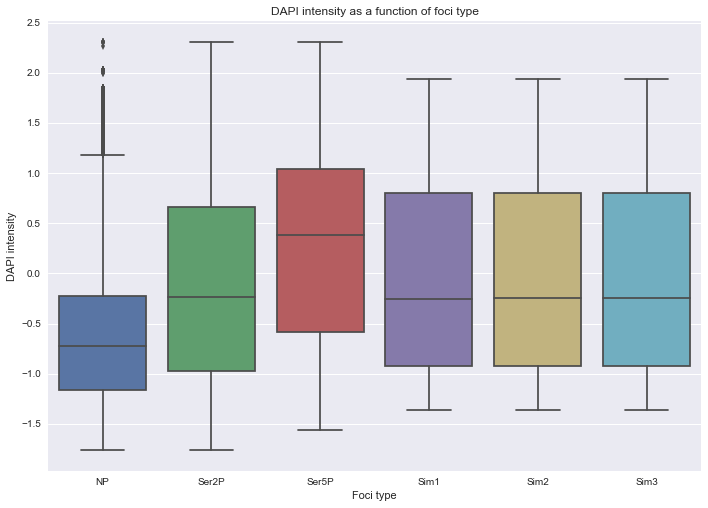

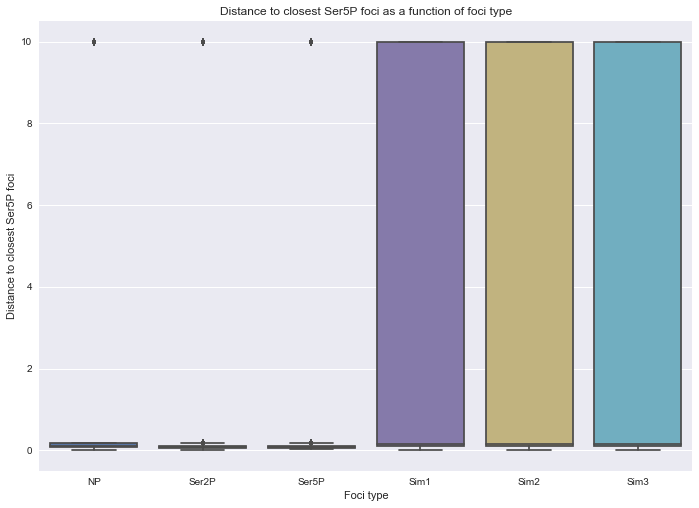

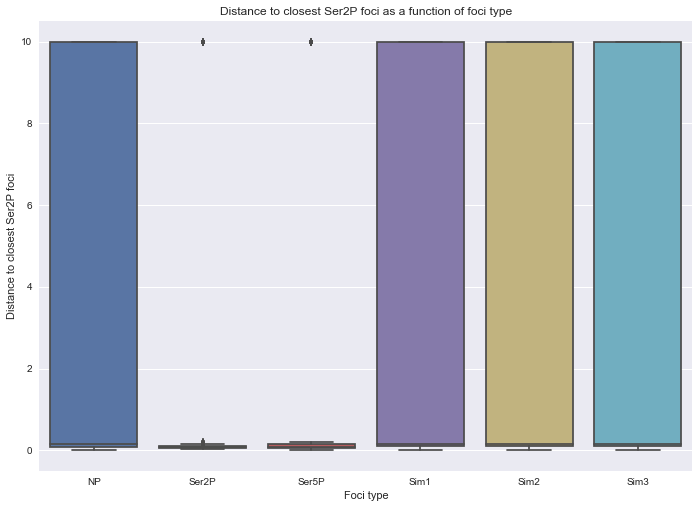

In [66]:
for feat, lab in zip(SelFeat, Ylab):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot(TrainSet["FociType"], TrainSet[feat])
    plt.xlabel("Foci type")
    ax.set_xticklabels(["NP", "Ser2P", "Ser5P","Sim1", "Sim2", "Sim3"])
    plt.ylabel(lab)
    plt.title(lab+" as a function of foci type")
    plt.show()

### Predict  observed data and evaluate model

In [91]:
CopyTest=TestSet.copy()
CopyTest.head()

,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,...,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId
1233060,0,19,0.184247,0.181268,0.196950,0.165513,0.119266,0.183942,0.165596,0.107724,...,-1.335797,-1.337956,-0.603594,-0.375556,0.711669,-0.592338,-0.932441,-0.322298,-0.866114,0
507715,1,14,10.000000,10.000000,10.000000,0.160592,0.111223,0.197024,0.130946,0.044262,...,0.700165,1.519251,0.567296,-0.179559,0.445828,0.861799,1.399271,0.976696,-0.737488,1
2496599,4,0,0.181350,0.162481,0.192356,0.160378,0.160378,0.160378,10.000000,10.000000,...,-1.093877,0.395003,-1.539651,0.500694,0.171241,-0.479347,0.505605,-1.252648,-1.051472,0
2208831,2,30,0.114608,0.114608,0.114608,10.000000,10.000000,10.000000,10.000000,10.000000,...,-0.706003,-0.563105,0.551110,2.416690,-0.023768,-0.145826,-0.292588,0.754845,2.586794,1
2395242,0,42,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,-1.345519,-1.263538,-1.359864,1.937745,-0.865492,-0.804094,-0.948482,-1.057316,1.119710,1


In [92]:
TestSet=TestSet[TestSet["FociType"]<3]
rf.predict(TestSet[Lab])


array([0, 1, 2, ..., 2, 2, 0], dtype=int64)

In [93]:
rf.predict_proba(TestSet[Lab])[0:6]

array([[ 0.9 ,  0.09,  0.01],
       [ 0.  ,  0.98,  0.02],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.98,  0.02,  0.  ],
       [ 0.  ,  0.95,  0.05],
       [ 0.  ,  0.  ,  1.  ]])

In [94]:
PredFoci=rf.predict(TestSet[Lab])

In [95]:
pd.Categorical(PredFoci).codes

array([0, 1, 2, ..., 2, 2, 0], dtype=int8)

In [96]:
FociNames=["NP", "Ser2P", "Ser5P"]
predFociRealLab = [FociNames[y] for y in PredFoci]
print(len(predFociRealLab))
predFociRealLab [0:6]

745719


['NP', 'Ser2P', 'Ser5P', 'NP', 'Ser2P', 'Ser5P']

In [98]:
[FociNames[y] for y in TestSet["FociType"].values[0:6]]

['NP', 'Ser2P', 'Ser5P', 'NP', 'Ser2P', 'Ser5P']

In [11]:
ObserRealLab=[FociNames[y] for y in TestSet["FociType"].values]

NameError: name 'FociNames' is not defined

In [110]:
pd.crosstab(np.array(ObserRealLab), np.array(predFociRealLab), rownames=['Actual Foci'], colnames=['Predicted Foci'])

Predicted Foci,NP,Ser2P,Ser5P
Actual Foci,,,
NP,129740,30,446
Ser2P,670,246148,131
Ser5P,16,157,368381


In [116]:
print("Accuracy score:")
print(metrics.accuracy_score(TestSet["FociType"].values, PredFoci))

Accuracy score:
0.998055567848


### Conclusions
These features do distinguish the different foci = biological reasons ...

### Similar analysis for segmented vs simulated
**Live out segmentChannel :for simulated spots values are set to /missing 

In [21]:
labels  = TrainSet["FociType"].values
labels  = np.array(labels<3) #0 =simulated, 1 = observed
features= TrainSet.drop(['FociType','File','SegmentChannel', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values

In [19]:
pd.Categorical(labels).codes

array([1, 1, 0, ..., 1, 0, 1], dtype=int8)

In [20]:
labels=pd.Categorical(labels).codes
rf= ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(features,labels)
impFeatures=rf.feature_importances_

KeyboardInterrupt: 

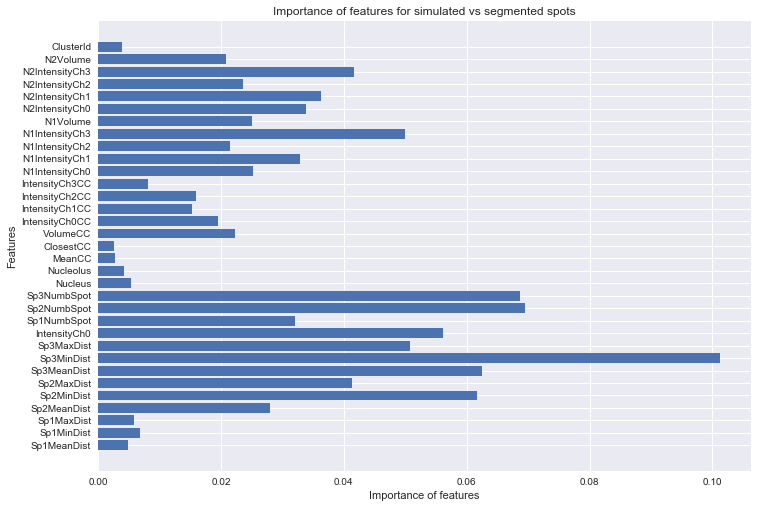

In [122]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features for simulated vs segmented spots")
plt.show()

In [133]:
TestSet=CopyTest.copy()
rf.predict(TestSet[Lab])


array([1, 1, 0, ..., 0, 0, 1], dtype=int8)

In [134]:
PredFoci=rf.predict(TestSet[Lab])

In [135]:
FociNames=["Simulated", "Segmented"]
predFociRealLab = [FociNames[y] for y in PredFoci]
print(len(predFociRealLab))
predFociRealLab [0:6]

1033719


['Segmented', 'Segmented', 'Simulated', 'Segmented', 'Segmented', 'Simulated']

In [136]:
pd.Categorical(TestSet["FociType"].values<3)


[True, True, False, True, True, ..., False, True, False, False, True]
Length: 1033719
Categories (2, object): [False, True]

In [12]:
FociNames=["Simulated", "Segmented"]
RealData=pd.Categorical(TestSet["FociType"].values<3).codes
ObserRealLab=[FociNames[y] for y in RealData]
ObserRealLab[0:6]

['Segmented', 'Segmented', 'Segmented', 'Segmented', 'Segmented', 'Segmented']

In [138]:
pd.crosstab(np.array(ObserRealLab), np.array(predFociRealLab), rownames=['Actual Foci'], colnames=['Predicted Foci'])

Predicted Foci,Segmented,Simulated
Actual Foci,,
Segmented,745677,42
Simulated,21,287979


In [139]:
print("Accuracy score:")
print(metrics.accuracy_score(RealData, PredFoci))

Accuracy score:
0.999939055004


#### Conclustion
1. Great accuracy score + false postive is 42, insignificant 
2. According to barplot of feature importance: the features that are not very important to seperate the segmented and simulated spots are ....

In [28]:
NonImpFeatures=["ClusterId", "ClosestCC", "MeanCC","Nucleus", "Nucleolus", "Sp1MaxDist", "Sp1MinDist", "Sp1MeanDist"]
ImpFeatures=TestSet[Lab]
ImpFeatures=ImpFeatures.drop(NonImpFeatures, axis=1)

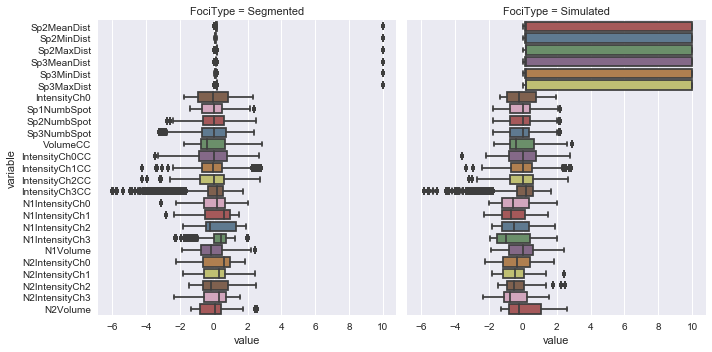

In [29]:
ImpFeatures["FociType"]=np.array(ObserRealLab)

g = sns.FacetGrid(pd.melt(ImpFeatures, id_vars='FociType'), col='FociType', size=5)
g.map(sns.boxplot, 'value', 'variable', palette=sns.color_palette("Set1", n_colors=8, desat=.5))

In [20]:
labels  = newdf["FociType"].values
labels  = np.array(labels<3) #0 =simulated, 1 = observed
labels  = [x*(y+1) for x,y in zip(labels,newdf["FociType"].values)] #0=simulated, 1=NP, 2=Ser2P, 3=Ser5P
pd.Categorical(labels)

[1, 1, 1, 1, 1, ..., 0, 0, 0, 0, 0]
Length: 3445727
Categories (4, int64): [0, 1, 2, 3]

In [21]:
newdf["FociType"]=labels
TrainSet,TestSet = train_test_split(newdf,stratify=labels, test_size=0.3, random_state=20012017)

#### Can we predict distance to periphery = proxy center of mass

In [22]:
labels  = TrainSet["Nucleus"].values
features= TrainSet.drop(['Nucleus','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values

In [23]:
regr = ensemble.RandomForestRegressor(n_estimators=100, random_state=20012017)
regr.fit(features,labels)
impFeatures=regr.feature_importances_

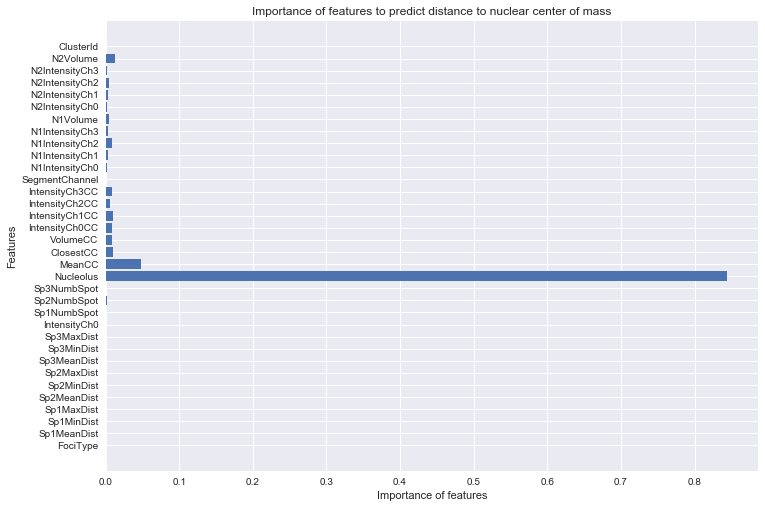

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features to predict distance to nuclear center of mass")
plt.show()

In [25]:
prediction=regr.predict(TestSet[Lab])

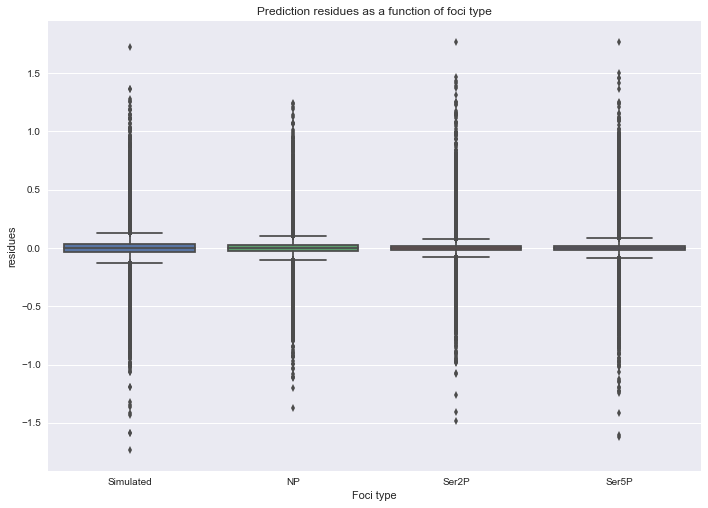

In [27]:
df=pd.DataFrame({"Lab":TestSet["Nucleus"], "Pred":prediction})
df["res"] = df["Lab"].subtract(df["Pred"])
df["foci"] = newdf["FociType"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(df["foci"], df["res"])
plt.xlabel("Foci type")
ax.set_xticklabels(["Simulated","NP", "Ser2P", "Ser5P"])
plt.ylabel("residues")
plt.title("Prediction residues as a function of foci type")
plt.show()

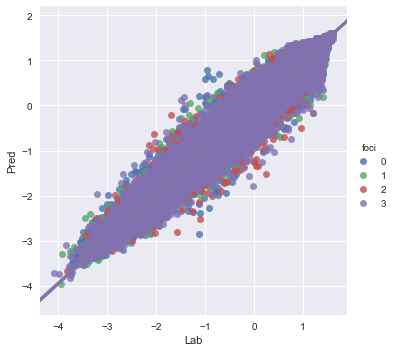

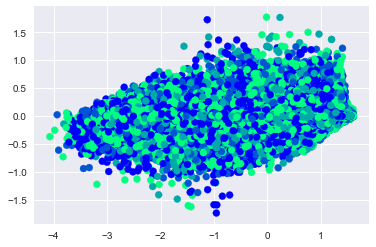

In [28]:

sns.lmplot("Lab","Pred",data=df, hue="foci")
fig, ax = plt.subplots()
ax.scatter(df["Lab"],df["res"], c=df["foci"], cmap="winter")
#sns.lmplot("Res","Lab",data=df, hue="Foci")

#### Conclusion 
- There is a a relationship between center of mass of the nucleus, the nucleolus and and the center of mass of all chromocenters, since I am able to predict quite well for simulated spots as well - do the same thing with just these three variables using FISH images as well
- Here I want to know about the relationship between RNA Polii and periphery. So to better see the difference between segmented and simulated spots I train the model just on segmented ones and test it on test data and on simulated data

In [31]:
ControlNegative=newdf[newdf["FociType"]==0]
SegData=newdf[newdf["FociType"]>0]
labels=SegData["FociType"]
TrainSet,TestSet = train_test_split(SegData,stratify=labels, test_size=0.3, random_state=20012017)

#### Can we predict distance to periphery = proxy center of mass

In [53]:
labels  = TrainSet["Nucleus"].values
features= TrainSet.drop(['Nucleus','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values

In [54]:
regr = ensemble.RandomForestRegressor(n_estimators=100, random_state=20012017)
regr.fit(features,labels)
impFeatures=regr.feature_importances_

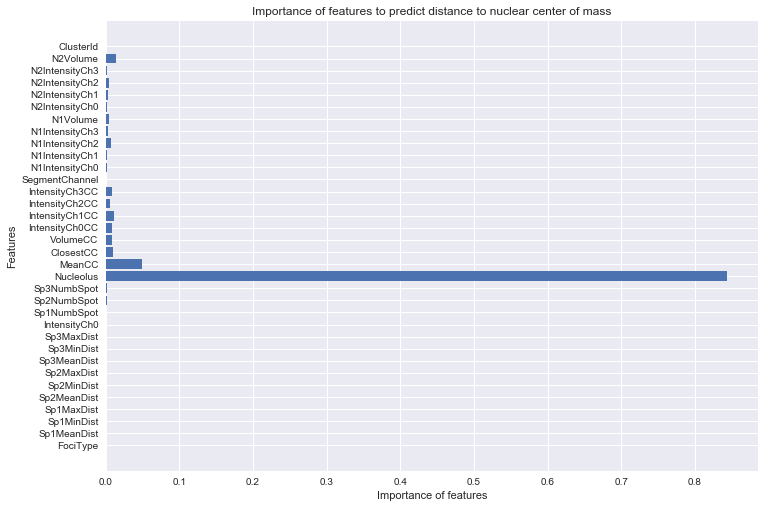

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features to predict distance to nuclear center of mass")
plt.show()

In [56]:
predictionTest=regr.predict(TestSet[Lab])
predictionNeg=regr.predict(ControlNegative[Lab])

In [57]:
print("Accuracy score for segmented spots:")
print(regr.score(TestSet[Lab], TestSet["Nucleus"]))
print("Accuracy score for simulated spots:")
print(regr.score(ControlNegative[Lab], ControlNegative["Nucleus"]))

Accuracy score for segmented spots:
0.992547487382
Accuracy score for simulated spots:
0.957018833958


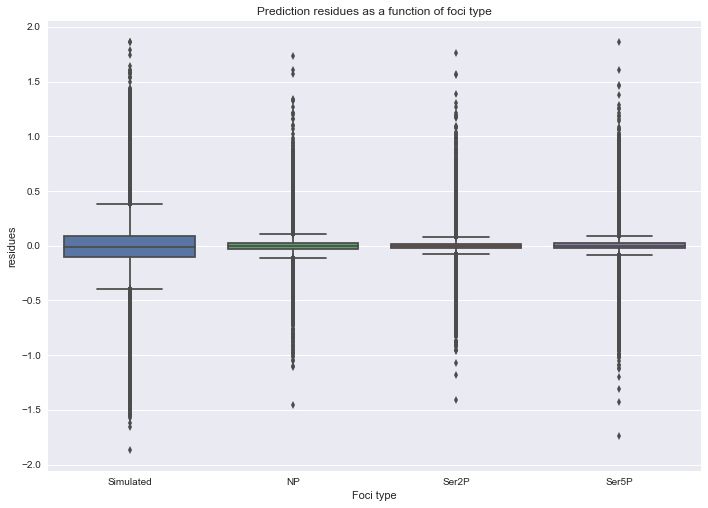

In [40]:
Pred=np.concatenate((np.array(predictionTest), np.array(predictionNeg)))
Obs=np.concatenate((np.array(TestSet["Nucleus"]), np.array(ControlNegative["Nucleus"])))
Foci=np.concatenate((np.array(TestSet["FociType"]), np.array(ControlNegative["FociType"])))
Res=Obs-Pred
df=pd.DataFrame({"Lab":Obs, "Pred":Pred, "Res":Res, "Foci": Foci})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(df["Foci"], df["Res"])
plt.xlabel("Foci type")
ax.set_xticklabels(["Simulated","NP", "Ser2P", "Ser5P"])
plt.ylabel("residues")
plt.title("Prediction residues as a function of foci type")
plt.show()

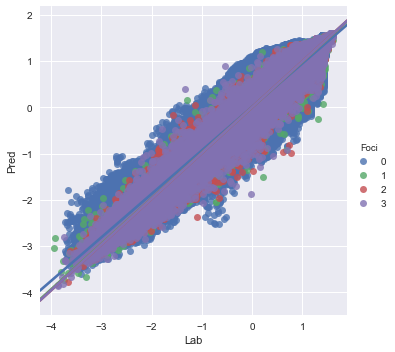

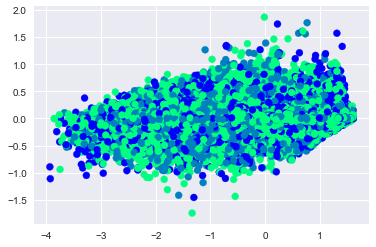

In [42]:
sns.lmplot("Lab","Pred",data=df, hue="Foci")
fig, ax = plt.subplots()
Res=np.array(TestSet["Nucleus"])-np.array(predictionTest)
ax.scatter(np.array(TestSet["Nucleus"]),Res, c=np.array(TestSet["FociType"]), cmap="winter")
#sns.lmplot("Res","Lab",data=df, hue="Foci")

In [43]:
labels  = TrainSet["Nucleus"].values
features= TrainSet.drop(['Nucleus',"Nucleolus","MeanCC",'File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values

In [44]:
regr = ensemble.RandomForestRegressor(n_estimators=100, random_state=20012017)
regr.fit(features,labels)
impFeatures=regr.feature_importances_

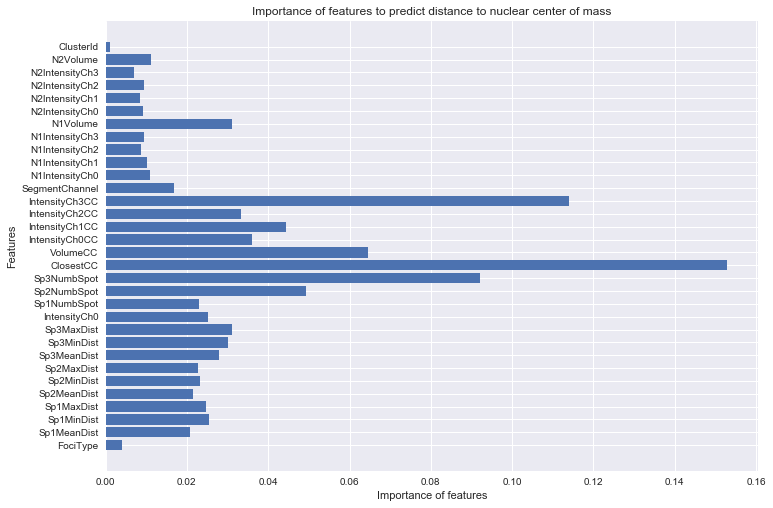

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features to predict distance to nuclear center of mass")
plt.show()

In [46]:
predictionTest=regr.predict(TestSet[Lab])
predictionNeg=regr.predict(ControlNegative[Lab])

In [51]:
print("Accuracy score for segmented spots:")
print(regr.score(TestSet[Lab], TestSet["Nucleus"]))
print("Accuracy score for simulated spots:")
print(regr.score(ControlNegative[Lab], ControlNegative["Nucleus"]))

Accuracy score for segmented spots:
0.648500648262
Accuracy score for simulated spots:
0.165409457649


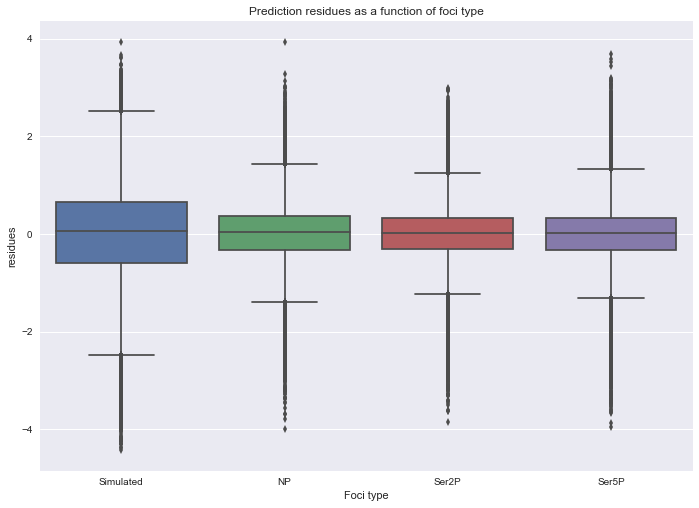

In [49]:
Pred=np.concatenate((np.array(predictionTest), np.array(predictionNeg)))
Obs=np.concatenate((np.array(TestSet["Nucleus"]), np.array(ControlNegative["Nucleus"])))
Foci=np.concatenate((np.array(TestSet["FociType"]), np.array(ControlNegative["FociType"])))
Res=Obs-Pred
df=pd.DataFrame({"Lab":Obs, "Pred":Pred, "Res":Res, "Foci": Foci})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(df["Foci"], df["Res"])
plt.xlabel("Foci type")
ax.set_xticklabels(["Simulated","NP", "Ser2P", "Ser5P"])
plt.ylabel("residues")
plt.title("Prediction residues as a function of foci type")
plt.show()

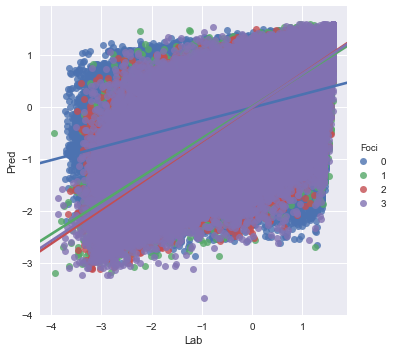

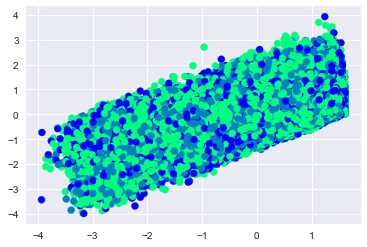

In [50]:
sns.lmplot("Lab","Pred",data=df, hue="Foci")
fig, ax = plt.subplots()
Res=np.array(TestSet["Nucleus"])-np.array(predictionTest)
ax.scatter(np.array(TestSet["Nucleus"]),Res, c=np.array(TestSet["FociType"]), cmap="winter")
#sns.lmplot("Res","Lab",data=df, hue="Foci")

In [ ]:
Result=pd.DataFrame()
for p in range(1,5):
    FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/"+str(p)+"/XTCountSpotPerShell_Result/MLResult.csv"
    #FilePath = "Z:/Result0309/s20_Wt/"+str(p)+"/XTCountSpotPerShell_Result/MLResult.csv" for windows
    features = pd.read_csv(FilePath)
    Result=Result.append(features)

### Get importance of features in the model

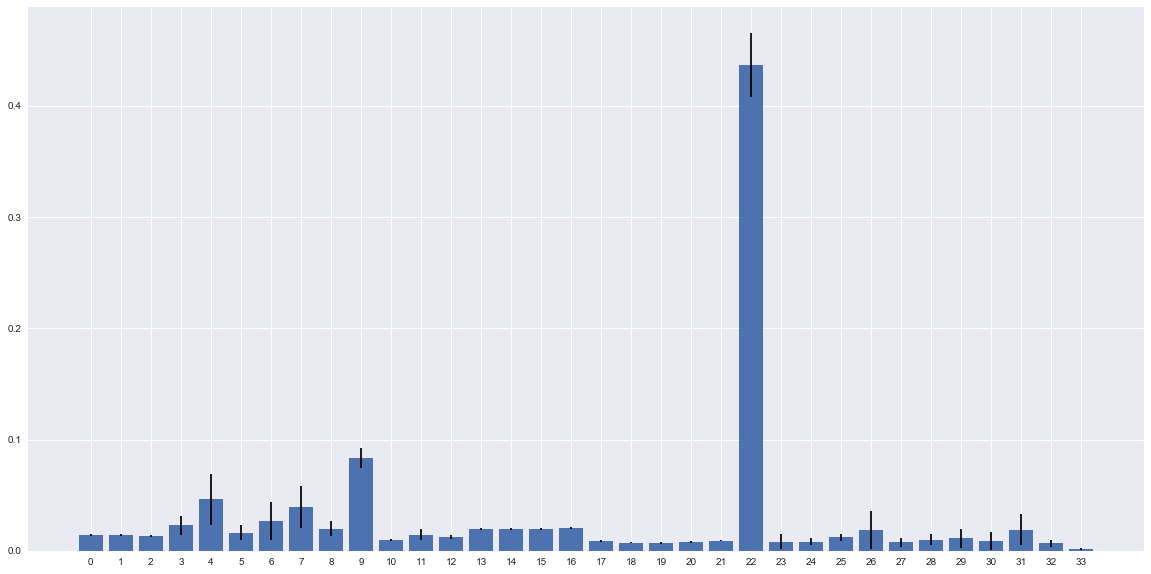

In [137]:
rf = ensemble.RandomForestClassifier()
rf.fit(features, labels.ravel())

importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=Lab, columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.iloc[:, 0]
yerr = importance.iloc[:, 1]

fig,ax = plt.subplots(figsize=(20, 10))
plt.bar(x, y, yerr=yerr, align="center")
ax.set_xticks(x)
plt.show()

In [141]:
pd.DataFrame(Lab)

,0
0,Sp1MeanDist
1,Sp1MinDist
2,Sp1MaxDist
3,Sp2MeanDist
4,Sp2MinDist
5,Sp2MaxDist
6,Sp3MeanDist
7,Sp3MinDist
8,Sp3MaxDist
9,IntensityCh0


In [140]:
[x for x,y in zip(Lab,importance["Importance"]) if y>0.04]

['Sp2MinDist', 'IntensityCh0', 'SegmentChannel']

### Classifier result
1. The segmentation is a the a result of intensity difference, so I removed foci intensity columns from features in data set
2. The accuracy score of the random forest classifier is 0.901, which means the classifier was able to predict corretly 90% of the time when intensity columns are added in
3. The accuracy score drops to 0.4 without the intensity features
4. The accuracy score increases to 0.5 when I drop foci == 2 from : sill twice as many errors in Ser2 than in NP
5. To see if we can improve those odds with other classifiers = it takes too much time computational  
6. The highest features discriminating between foci type are: DAPI (highest score), spot distance to Ser2P and Ser5P spots, and to the center of masses of the nucleus, the nucleolus and the CC -> ttest of selected features
7. Check intensity difference between the correct and the wrong predicted spots -> Check wrong predictions

#### Selected features

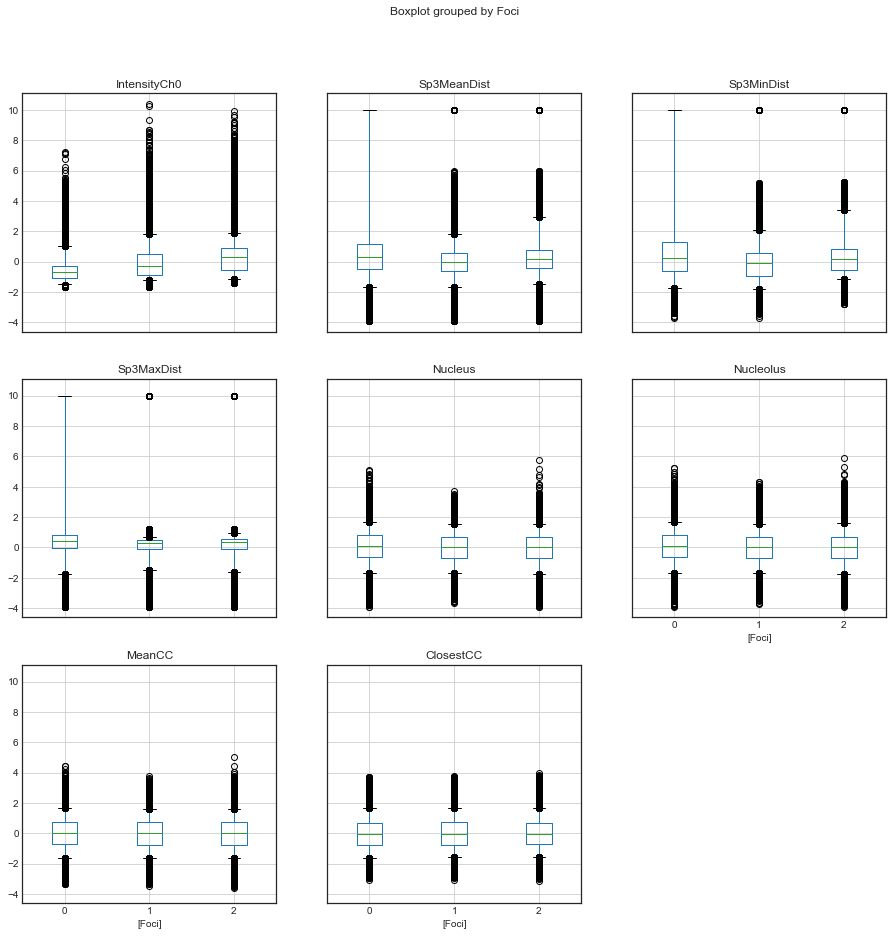

In [93]:
SelectedFeat=[x for x,y in zip(Lab,importance["Importance"]) if y>0.04]
fig = plt.figure(figsize=(30, 25))
axes = newdf.boxplot(column=SelectedFeat, by=['Foci'], whis=[5,95], figsize = [15,15],return_type='axes')
plt.show()

In [79]:
#?stats.spearmanr
Feat=newdf[SelectedFeat]
#rho, pval=stats.spearmanr(newdf, labels)

In [117]:
#newdf.groupby('Foci').MeanCC.hist(alpha=0.4)
two_data = pd.DataFrame(Feat, index=newdf['Foci'])
#t0wo_data.loc[0].head()
pval=stats.ttest_ind(two_data.loc[0], two_data.loc[1], equal_var=False, nan_policy="omit").pvalue
print 'Comb NP-Ser2' ,[x for x,y in zip(SelectedFeat, pval) if y<0.01]
pval=stats.ttest_ind(two_data.loc[0], two_data.loc[2], equal_var=False, nan_policy="omit").pvalue
print 'Comb NP-Ser5',[x for x,y in zip(SelectedFeat, pval) if y<0.01]
pval=stats.ttest_ind(two_data.loc[1], two_data.loc[2], equal_var=False, nan_policy="omit").pvalue
print 'Comb Ser2-Ser5',[x for x,y in zip(SelectedFeat, pval) if y<0.01]

Comb NP-Ser2 ['IntensityCh0', 'Sp3MeanDist', 'Sp3MinDist', 'Sp3MaxDist', 'Nucleus', 'Nucleolus', 'MeanCC', 'ClosestCC']
Comb NP-Ser5 ['IntensityCh0', 'Sp3MeanDist', 'Sp3MinDist', 'Sp3MaxDist', 'Nucleus', 'Nucleolus', 'MeanCC', 'ClosestCC']
Comb Ser2-Ser5 ['IntensityCh0', 'Sp3MeanDist', 'Sp3MinDist', 'Sp3MaxDist', 'Nucleus', 'Nucleolus', 'MeanCC', 'ClosestCC']


#### Wrong prediction : check intensity

       IntensityCh1  IntensityCh2  IntensityCh3
Foci                                           
0True      1.066668      1.066709     -1.121278
0True      0.915853      0.915780     -1.121278
0True      0.915853      0.915780     -1.121278
0True      1.066668      1.066709     -1.121278
0True      1.066668      1.066709     -1.121278


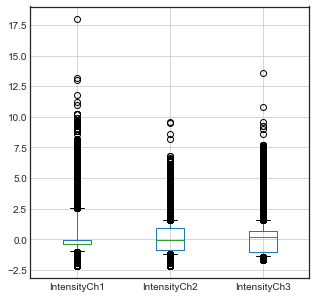

In [146]:
res = prediction == labels
IntensityFeat = ["IntensityCh1", "IntensityCh2", "IntensityCh3"]
Df = newdf[IntensityFeat]
x = newdf.Foci.astype(str)
y = res.astype(str)
z = x.str.cat(y)
Df.index=z
print(Df.head())
fig = plt.figure(figsize=(5, 5))
axes = Df.boxplot(column=["IntensityCh1", "IntensityCh2", "IntensityCh3"], by=None, whis=[5,95], figsize = [15,15],return_type='axes')
plt.show()

C:\Users\Pheonix\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


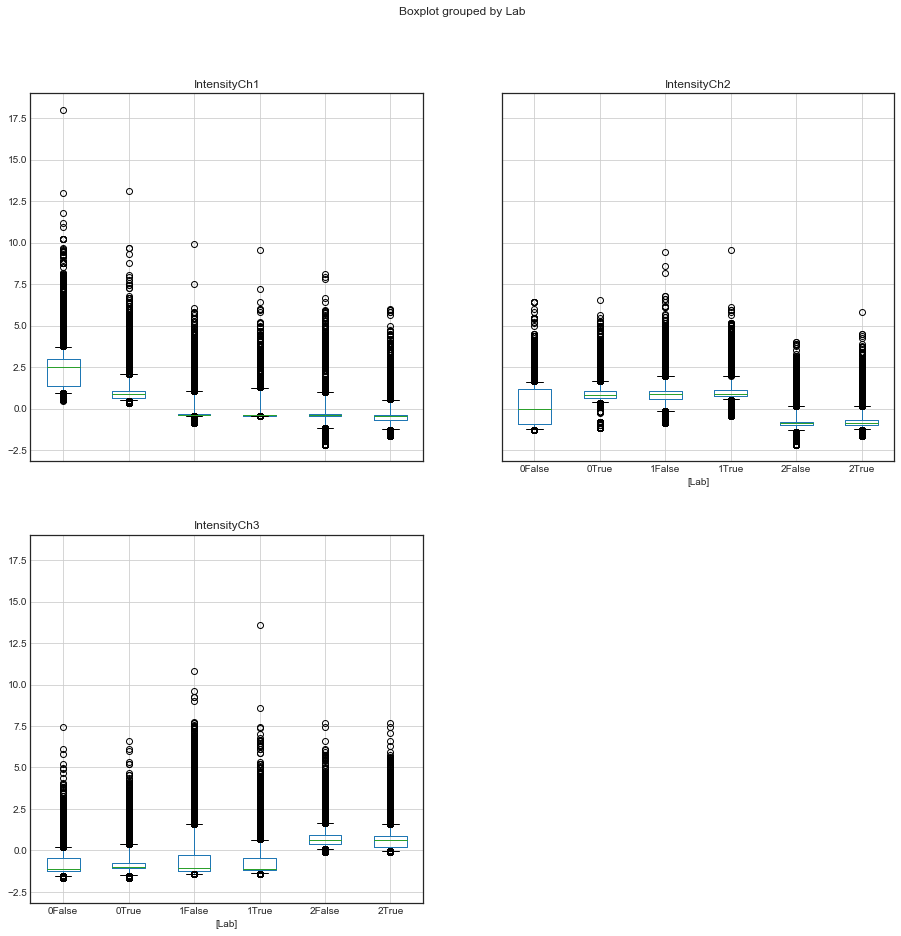

In [147]:
fig = plt.figure(figsize=(20, 30))
Df["Lab"]=Df.index
axes = Df.boxplot(column=["IntensityCh1", "IntensityCh2", "IntensityCh3"], by=["Lab"], whis=[5,95], figsize = [15,15],return_type='axes')
plt.show()

In [145]:
##ttest
pval1=stats.ttest_ind(Df.loc["1True"], Df.loc["1False" ], equal_var=False, nan_policy="omit").pvalue
pval2=stats.ttest_ind(Df.loc["2True"], Df.loc["2False"], equal_var=False, nan_policy="omit").pvalue
pval=stats.ttest_ind(Df.loc["0True"], Df.loc["0False"], equal_var=False, nan_policy="omit").pvalue
res=pd.DataFrame([pval, pval1, pval2])
res.index=["NP", "Ser2", "Ser5"]
res.columns=["IntensityCh1", "IntensityCh2", "IntensityCh3"]
res

,IntensityCh1,IntensityCh2,IntensityCh3
NP,0.000000e+00,0.0,0.0
Ser2,1.449036e-167,0.0,0.0
Ser5,0.000000e+00,0.0,0.0


# Regression

- Can we predict DAPI intensity with the other features
- This method will answer  the question: is there a pattern in RNA PolII distribution in regards to DNA content
- I use ElasticNetCV for regression

### MeanCC prediction:  

In [149]:
#from scipy import stats
mOTUs=newdf.drop(["MeanCC", "File"] , axis=1)
label = newdf["MeanCC"]
#ranked = np.array([stats.rankdata(mOTUs.iloc[i]) for i in range(len(mOTUs))])

In [ ]:
predictor = linear_model.ElasticNetCV(n_jobs=4)
Foci=newdf["Foci"].values
cv = cross_validation.LeaveOneLabelOut(labels=Foci)
prediction = cross_validation.cross_val_predict(predictor, np.array(mOTUs), label, cv=cv)
print("R2: {}".format(metrics.r2_score(label, prediction)))

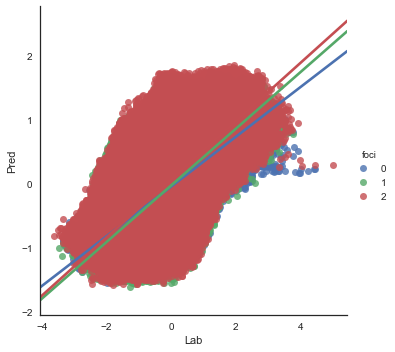

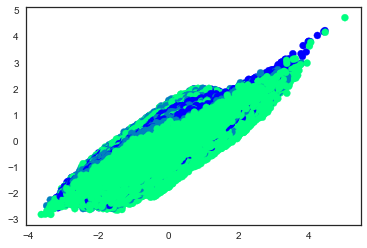

In [228]:
#fig, ax = plt.subplots()
#ax.scatter(label,prediction)
#ax.plot([0,5], [0,5],'k:')
#residuals =[label[i]-prediction[i] for i in range(len(label))]
df=pd.DataFrame({"Lab":label, "Pred":prediction})
df["res"] = df["Lab"].subtract(df["Pred"])
df["foci"] = newdf["FociType"]
sns.lmplot("Lab","Pred",data=df, hue="foci")
fig, ax = plt.subplots()
ax.scatter(df["Lab"],df["res"], c=df["foci"], cmap="winter")
#sns.lmplot("Res","Lab",data=df, hue="Foci")

### Intensity DAPI prediction


In [ ]:
#Set up data
mOTUs=newdf.drop(["IntensityCh0", "File"] , axis=1)
label = newdf["IntensityCh0"]
ranked = np.array([stats.rankdata(mOTUs.iloc[i]) for i in range(len(mOTUs))])
#Predict
predictor = linear_model.ElasticNetCV(n_jobs=4)
Foci=newdf["Foci"].values
cv = cross_validation.LeaveOneLabelOut(labels=Foci)
prediction = cross_validation.cross_val_predict(predictor, ranked, label, cv=cv)
print("R2: {}".format(metrics.r2_score(label, prediction)))
#plot predicted vs expected data

# Problem: can we build a model that can generalize across studies?

Big issues

- Not the same technology (Illumina vs 454 and different library preps)
- Not the same sequencing depth

![Q](Q.png) Suggestions?